In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [ ]:
url = "https://raw.githubusercontent.com/DevinaCitra/dataset/1fa305868aaefc563594bc39d5c92ad13c0438ed/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


Dataset yang diberikan adalah dataset tentang faktor risiko kanker serviks. Dataset ini mencakup beberapa variabel yang diduga memiliki hubungan dengan risiko terjadinya kanker serviks.

Tujuan dari pembuatan model untuk dataset ini adalah untuk mengembangkan suatu model yang dapat memprediksi risiko seseorang untuk terkena kanker serviks berdasarkan faktor-faktor risiko yang terdapat dalam dataset tersebut. Dengan demikian, model tersebut dapat membantu dalam identifikasi dini risiko kanker serviks pada individu tertentu, sehingga tindakan pencegahan atau pengobatan yang tepat dapat diberikan dengan lebih efektif.

**EDA**

In [ ]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
#Menganalisis Statistik Deskriptif
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Memeriksa nilai yang hilang dalam dataset
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


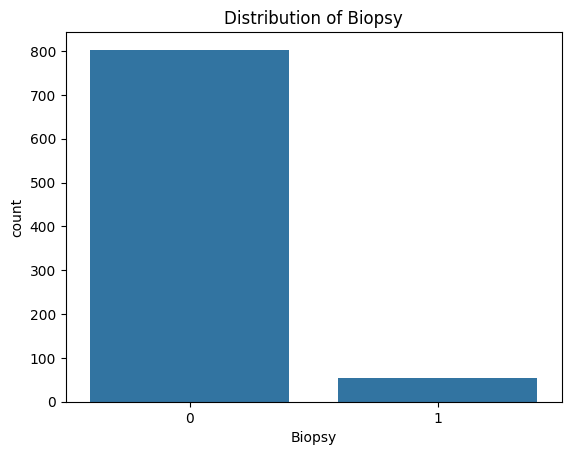

In [ ]:
# Distribusi variabel target
sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy')
plt.show()

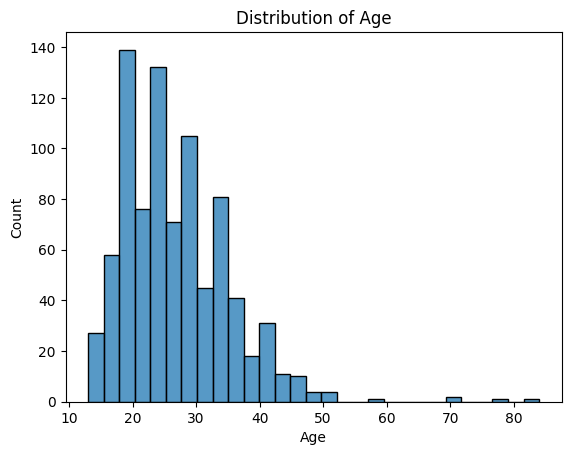

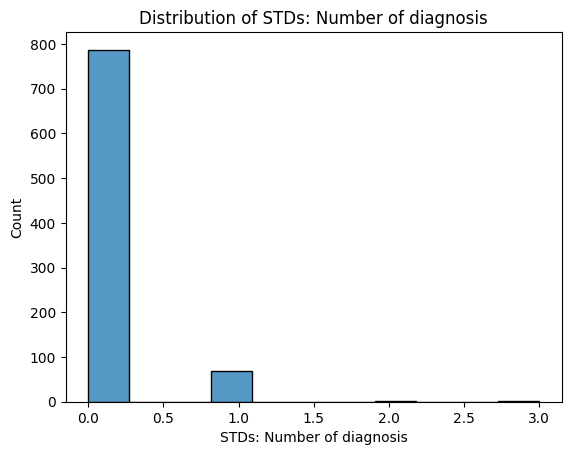

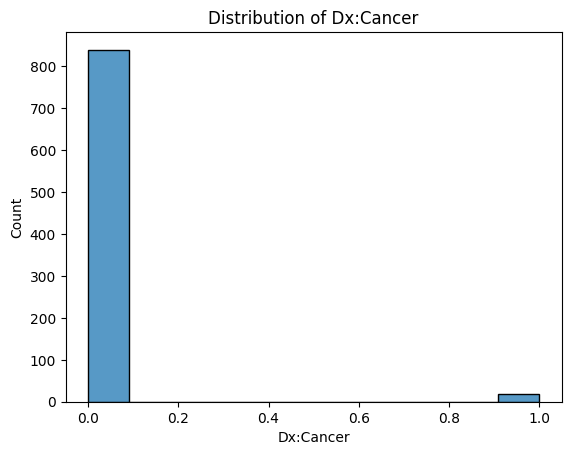

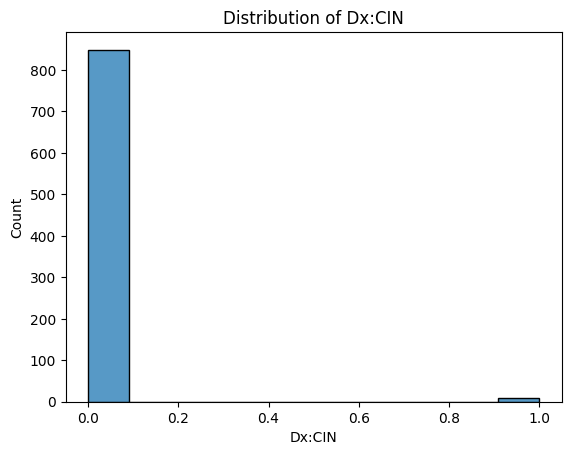

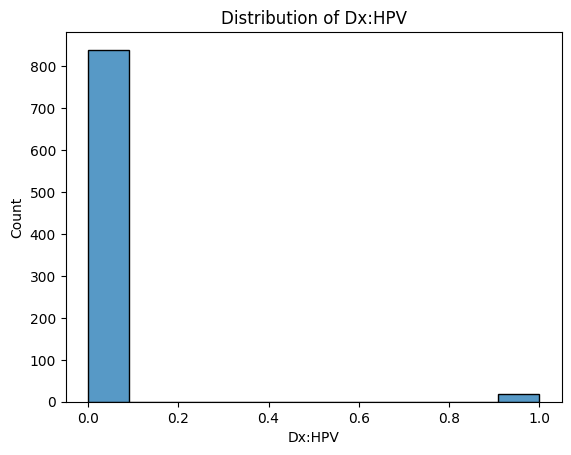

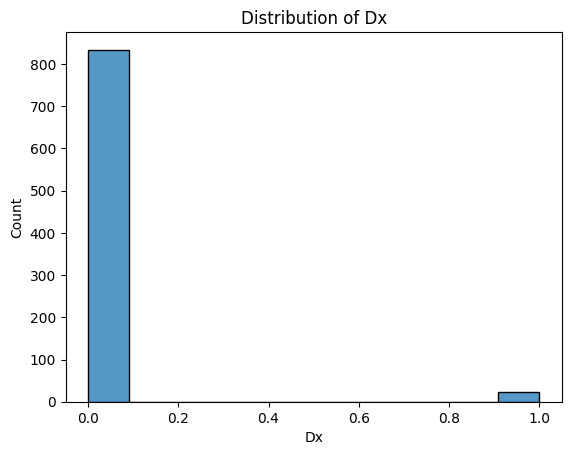

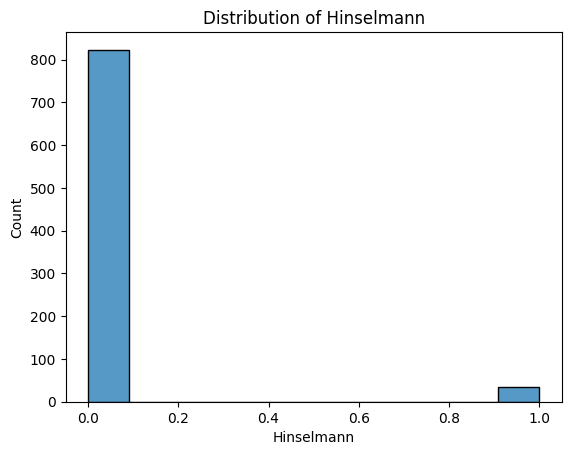

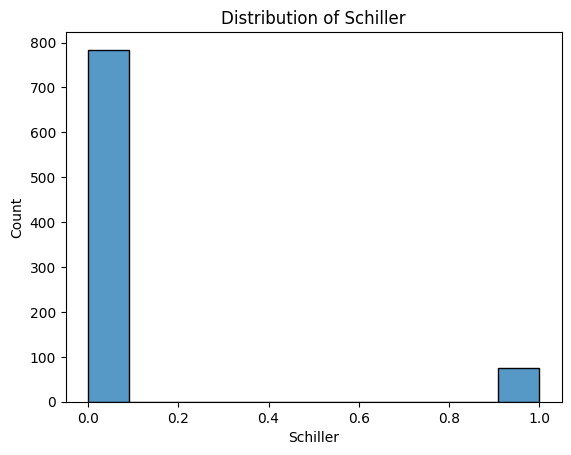

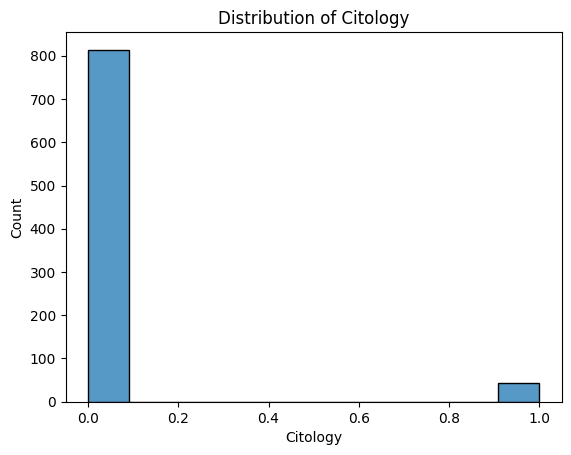

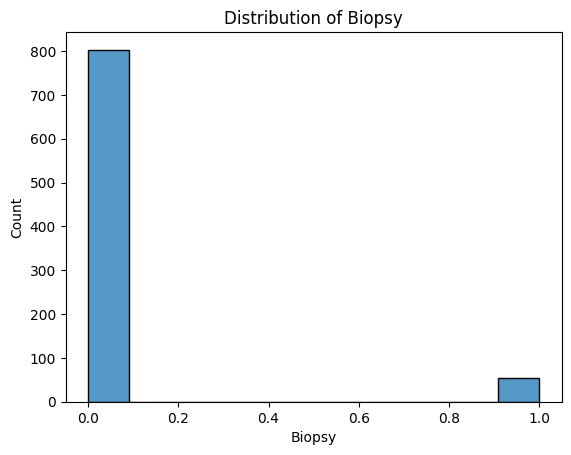

In [ ]:
# Distribusi variabel numerik
numeric_cols = df.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

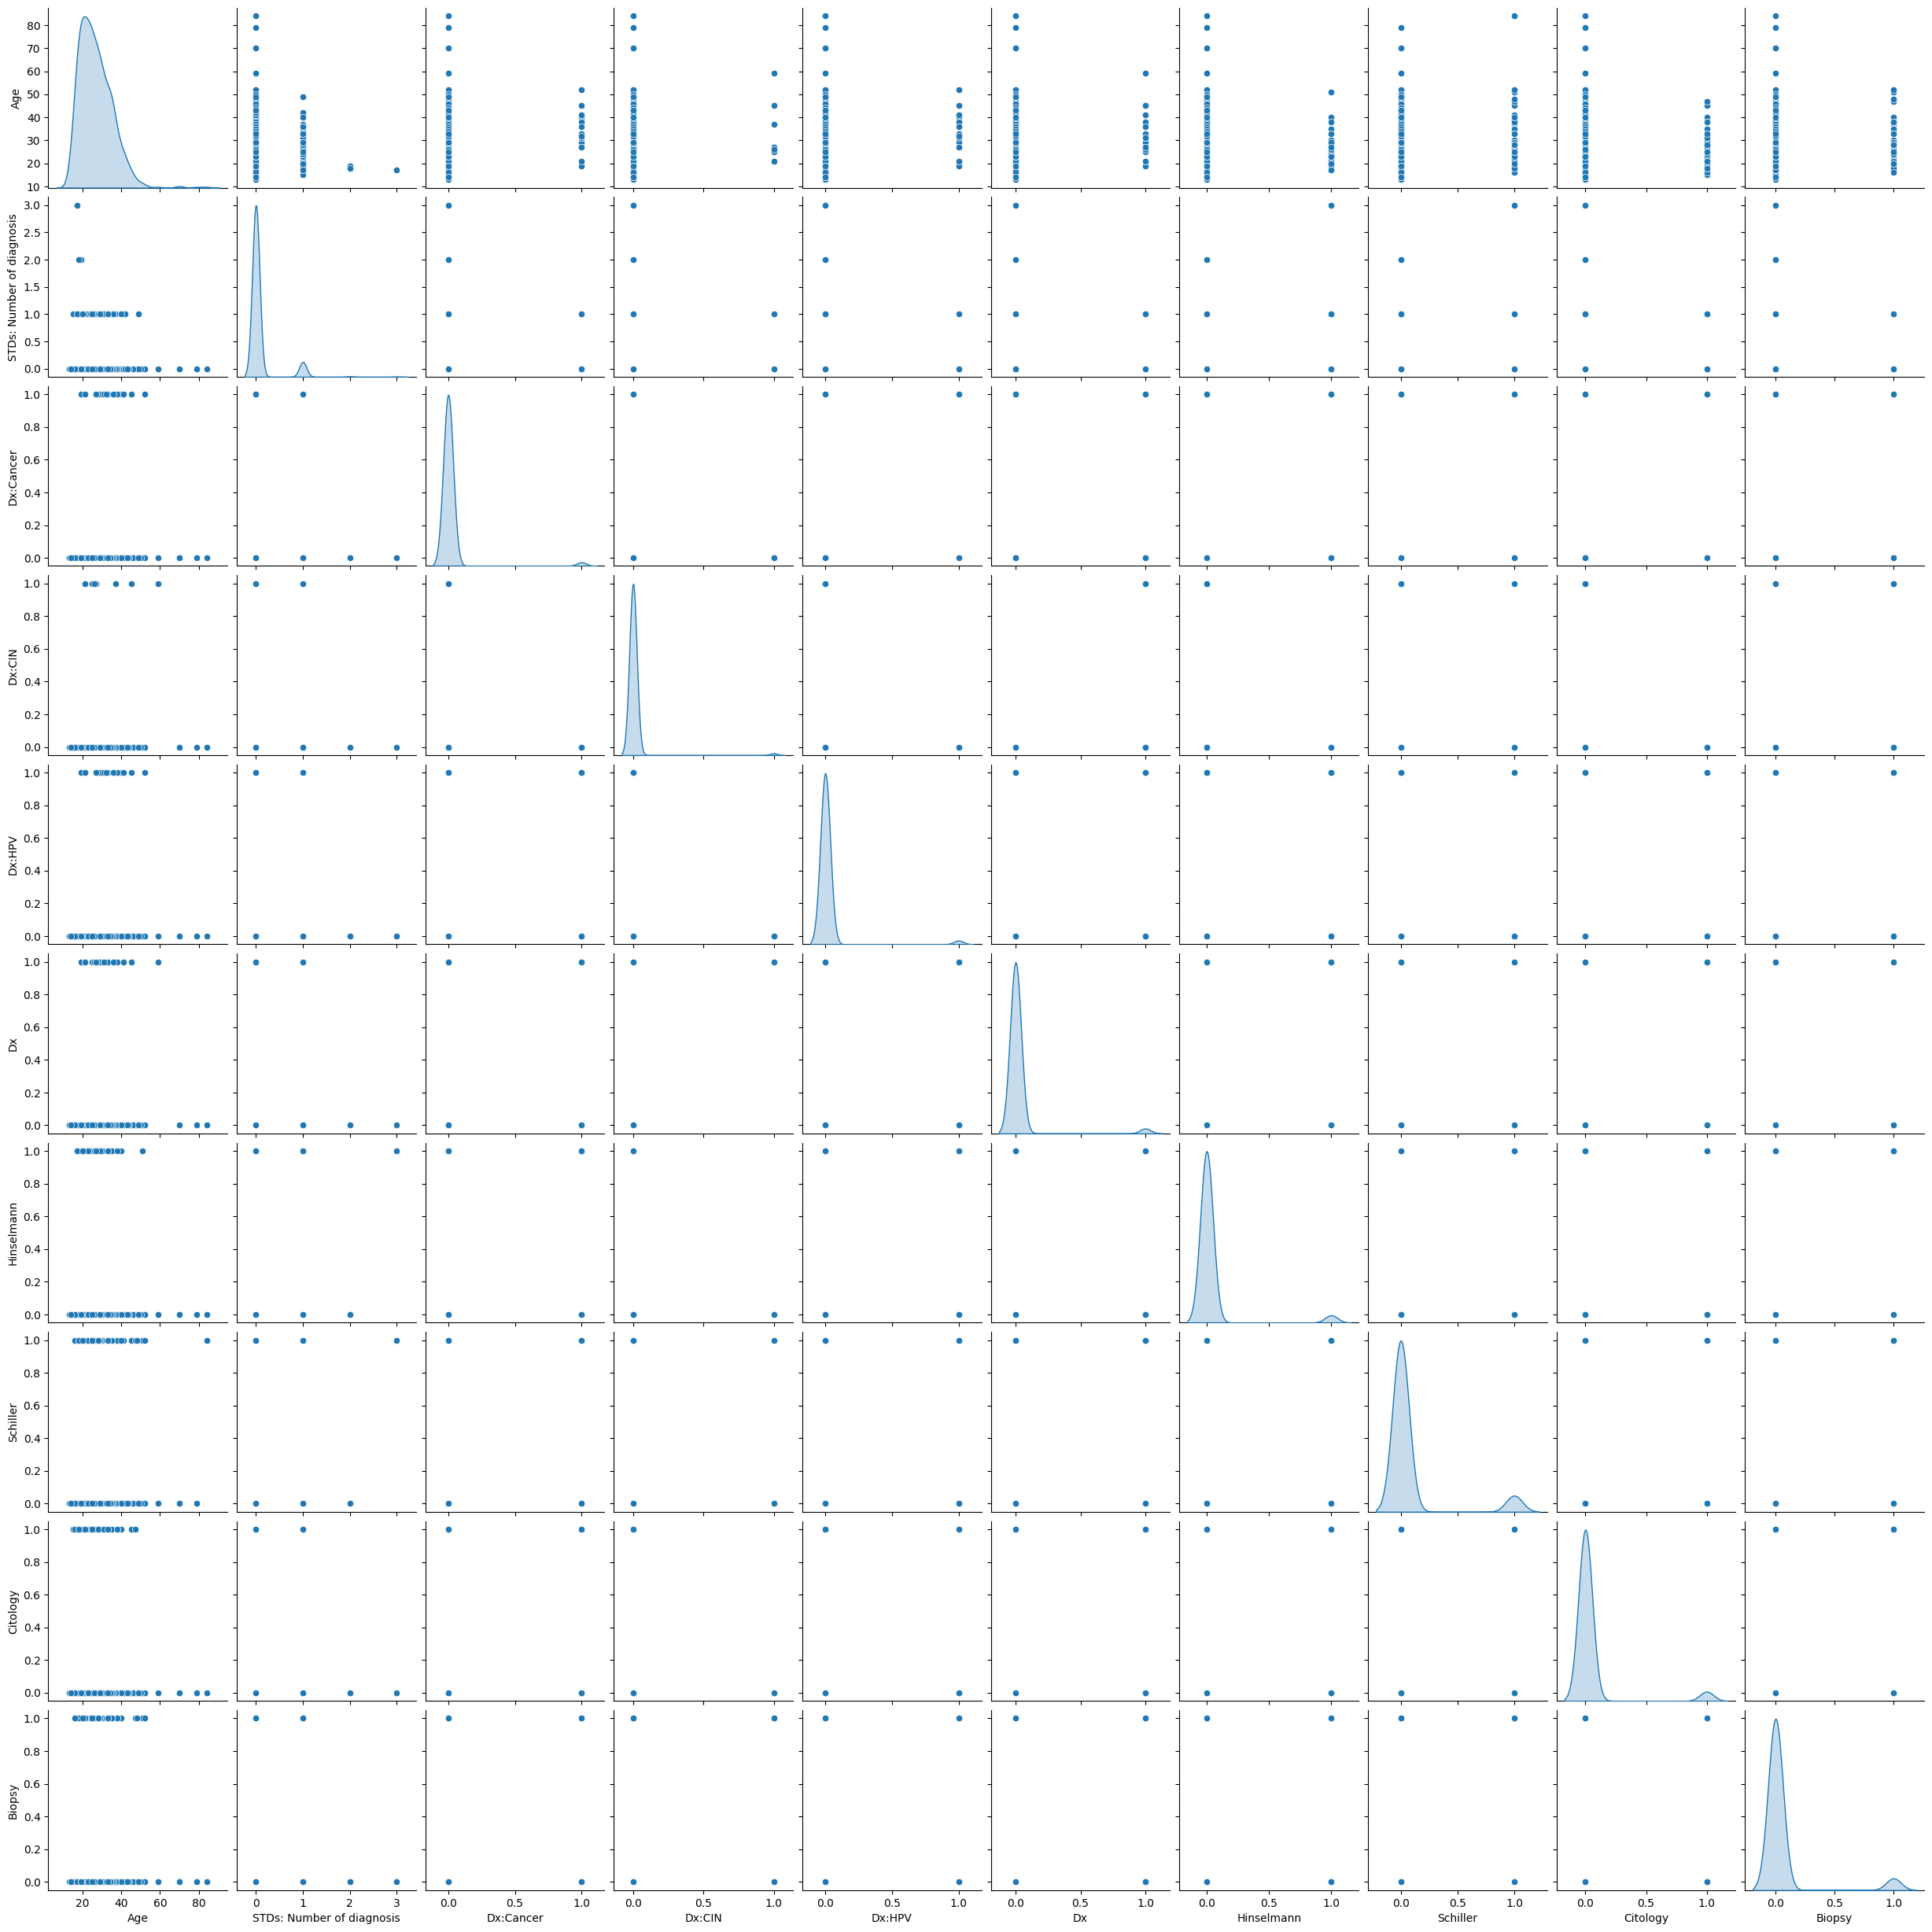

In [ ]:
# Hubungan antar variabel
sns.pairplot(df, diag_kind='kde')
plt.show()

**Preprocessing**

In [ ]:
# Mengganti nilai yang tidak valid dengan NaN
df.replace('?', np.nan, inplace=True)

In [ ]:
# Mengubah tipe data kolom ke numerik
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Menghapus baris yang mengandung NaN
df.dropna(inplace=True)

In [ ]:
# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) # Menggunakan semua fitur
df_scaled = pd.DataFrame(scaled_data, columns=df.columns) # Membuat DataFrame baru dengan data yang telah discaling

In [ ]:
# Balancing
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df.drop('Biopsy', axis=1), df['Biopsy'])
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

**Membagi Data**

In [ ]:
# Memisahkan fitur dan variabel target
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [ ]:
# Membagi data menjadi data pelatihan dan data uji dengan rasio 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Membuat Model**

In [ ]:
# Inisialisasi model Logistic Regression
log_reg_model = LogisticRegression(random_state=42)

In [ ]:
# Melatih model pada data pelatihan
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Memprediksi label untuk data uji
y_pred = log_reg_model.predict(X_test)

**Evaluasi**

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

Akurasi model: 0.9166666666666666


**Data Dummy**

In [ ]:
# Membuat 5 data dummy baru
dummy_data = {
    'Age': [30, 35, 40, 25, 45],
    'Number of sexual partners': [2, 1, 3, 1, 4],
    'First sexual intercourse': [18, 17, 20, 16, 21],
    'Num of pregnancies': [1, 2, 0, 3, 2],
    'Smokes': [1, 0, 1, 0, 1],
    'Smokes (years)': [0, 5, 10, 0, 15],
    'Smokes (packs/year)': [0, 3, 6, 0, 9],
    'Hormonal Contraceptives': [0, 1, 0, 1, 0],
    'Hormonal Contraceptives (years)': [0, 2, 4, 0, 6],
    'IUD': [0, 1, 0, 1, 0],
    'IUD (years)': [0, 1, 2, 0, 3],
    'STDs': [0, 1, 0, 1, 0],
    'STDs (number)': [0, 1, 2, 0, 3],
    'STDs:condylomatosis': [0, 1, 0, 1, 0],
    'STDs:cervical condylomatosis': [0, 1, 0, 1, 0],
    'STDs:vaginal condylomatosis': [0, 1, 0, 1, 0],
    'STDs:vulvo-perineal condylomatosis': [0, 1, 0, 1, 0],
    'STDs:syphilis': [0, 1, 0, 1, 0],
    'STDs:pelvic inflammatory disease': [0, 1, 0, 1, 0],
    'STDs:genital herpes': [0, 1, 0, 1, 0],
    'STDs:molluscum contagiosum': [0, 1, 0, 1, 0],
    'STDs:AIDS': [0, 1, 0, 1, 0],
    'STDs:HIV': [0, 1, 0, 1, 0],
    'STDs:Hepatitis B': [0, 1, 0, 1, 0],
    'STDs:HPV': [0, 1, 0, 1, 0],
    'STDs: Number of diagnosis': [0, 1, 2, 0, 3],
    'STDs: Time since first diagnosis': [0, 1, 2, 0, 3],
    'STDs: Time since last diagnosis': [0, 1, 2, 0, 3],
    'Dx:Cancer': [0, 1, 0, 1, 0],
    'Dx:CIN': [0, 1, 0, 1, 0],
    'Dx:HPV': [0, 1, 0, 1, 0],
    'Dx': [0, 1, 0, 1, 0],
    'Hinselmann': [0, 1, 0, 1, 0],
    'Schiller': [0, 1, 0, 1, 0],
    'Citology': [0, 1, 0, 1, 0],
}

In [ ]:
# Membuat DataFrame dari data dummy
dummy_df = pd.DataFrame(dummy_data)
dummy_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,30,2,18,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35,1,17,2,0,5,3,1,2,1,...,1,1,1,1,1,1,1,1,1,1
2,40,3,20,0,1,10,6,0,4,0,...,2,2,2,0,0,0,0,0,0,0
3,25,1,16,3,0,0,0,1,0,1,...,0,0,0,1,1,1,1,1,1,1
4,45,4,21,2,1,15,9,0,6,0,...,3,3,3,0,0,0,0,0,0,0


In [ ]:
# Memprediksi label untuk data dummy menggunakan model yang telah dilatih sebelumnya
y_pred_dummy = log_reg_model.predict(dummy_df)

In [ ]:
# Slicing untuk membuat jumlah sampelnya sama
y_test_subset = y_test[:5]

In [ ]:
# Evaluasi akurasi model pada data dummy
accuracy_dummy = accuracy_score(y_test_subset, y_pred_dummy)
print("Akurasi model pada data dummy:", accuracy_dummy)

Akurasi model pada data dummy: 0.8


**KESIMPULAN**

Model Logistic Regression yang telah dilatih sebelumnya memiliki akurasi yang lebih rendah pada data dummy (0.8) dibandingkan dengan data pelatihan (0.9167). Hal ini menunjukkan bahwa model tersebut mungkin tidak dapat digeneralisasi dengan baik untuk semua jenis data dan performanya mungkin menurun ketika diterapkan pada data baru yang belum terlihat.

Penurunan akurasi ini dapat disebabkan oleh beberapa faktor, seperti:
*   Perbedaan distribusi fitur antara data pelatihan dan data dummy.
*   Jumlah sampel yang lebih sedikit pada data dummy.

Akibatnya, model tersebut mungkin tidak dapat memprediksi dengan baik pada data dummy yang baru dibuat.